### Multi-omic Dataset: Latent representation using Kernel PCA
- Load Data
- Normalize Data
- Define Autoencoder Model
- Train Autoencoder with normalized dataset
- Use transformed dataset for classification
- Use transformed dataset for clustering
- Evaluation and Conclusions

In [1]:
import Models
import numpy as np
import random as rn
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

# Load Data
X_brca_mRNA_data = pd.read_csv('./BRCA_mRNA.txt', sep=',', index_col=0) # Dataset has Donor ID as first column
X_brca_CNA_data = pd.read_csv('./BRCA_CNA.txt', sep=',' ,index_col=0) # Dataset has Donor ID as first column
y_brca_data = pd.read_csv('./BRCA_Clinical.txt', sep=',', index_col=0, names=["Label"]) # Dataset has Donor ID on first column and Label on second column.

X_brca_mRNA_filtered = X_brca_mRNA_data.drop(["TCGA-AO-A12C-01","TCGA-AR-A1AT-01","TCGA-BH-A18V-06"], axis=1)
X_brca_CNA_filtered = X_brca_CNA_data.drop(["TCGA-AR-A0U1-01"], axis=1)
y_brca_filtered = y_brca_data.drop(["TCGA-AO-A12C-01","TCGA-AR-A1AT-01","TCGA-BH-A18V-06"], axis=0)


X_train_first_norm, X_train_second_norm, X_swapped_first_norm, X_swapped_second_norm, X_test_first_norm, X_test_second_norm, X_train_concat, X_swapped_concat, X_test_concat, y_train, y_test, y_train_oh, y_test_oh \
    = Models.prepare_datasets(X_brca_mRNA_filtered.T,X_brca_CNA_filtered.T, y_brca_filtered, test_size=0.2, swap_noise=0.15)


swapping: 20 rows.


In [50]:
import importlib
importlib.reload(Models)

<module 'Models' from 'C:\\Desarrollo\\Data Science\\Jupyter Notebooks\\Stage\\oss-stage-2019\\Multiomic Dataset\\Models.py'>

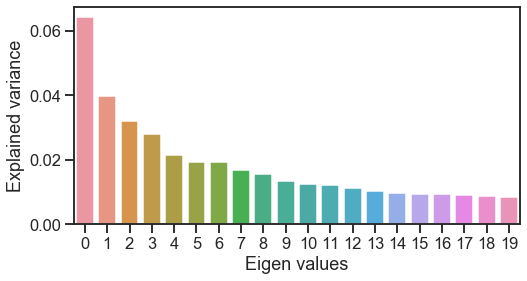

0.20500009696586


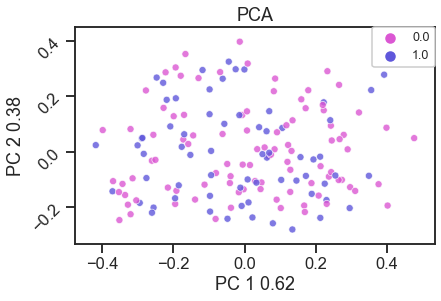

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



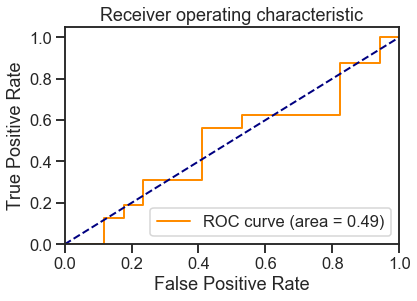

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



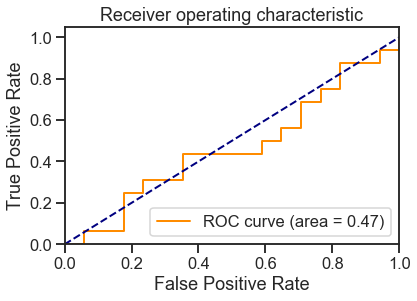

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.5923076923076923 

Best #estimators: 140 

Best max depth: None 



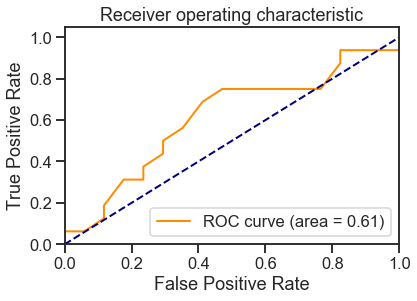

[[15  2]
 [14  2]]


              precision    recall  f1-score   support

           0       0.52      0.88      0.65        17
           1       0.50      0.12      0.20        16

    accuracy                           0.52        33
   macro avg       0.51      0.50      0.43        33
weighted avg       0.51      0.52      0.43        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.515152
mutual information: 0.0035781623145970504
AE 2 clusters -  silhoutte score: 0.04774896913813409
AE 3 clusters -  silhoutte score: 0.014052823088552489
AE 4 clusters -  silhoutte score: 0.013931660468682515
AE 5 clusters -  silhoutte score: 0.0019860507618080993
AE 6 clusters -  silhoutte score: 0.015115327390426165


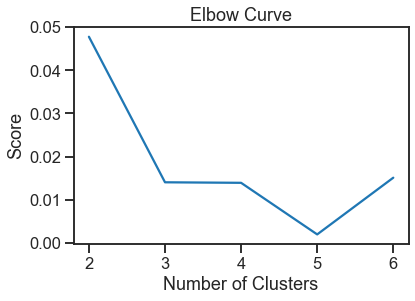

mutual information: 0.0033072781692372265
AE 2 clusters -  silhoutte score: 0.03568994002368004
AE 3 clusters -  silhoutte score: 0.004497626469778486
AE 4 clusters -  silhoutte score: -0.007408622180691143
AE 5 clusters -  silhoutte score: 0.0037468430905488316
AE 6 clusters -  silhoutte score: 0.00151233997061781


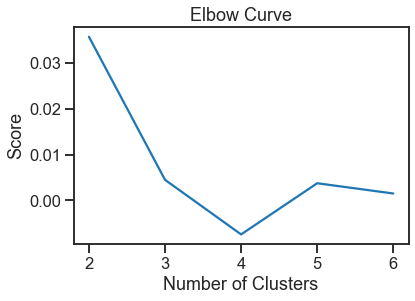

mutual information: 0.0030565308793107453
AE 2 clusters -  silhoutte score: 0.02151563069840897
AE 3 clusters -  silhoutte score: 0.026728177771802232
AE 4 clusters -  silhoutte score: -0.0015207650980665606
AE 5 clusters -  silhoutte score: 0.003330602935130103
AE 6 clusters -  silhoutte score: -0.00786347704911893


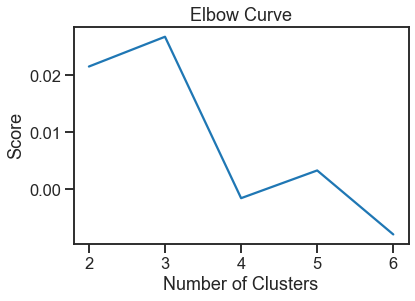

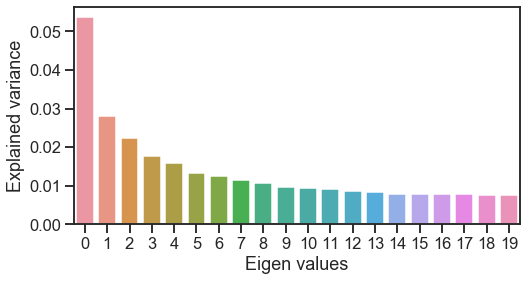

0.15108255190243808


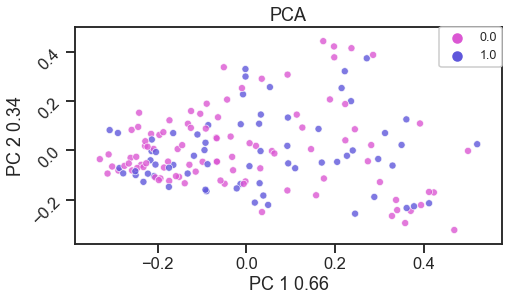

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



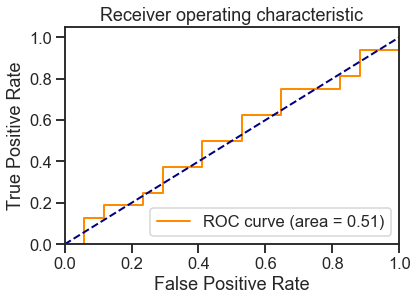

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152
Best score for training data:

C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



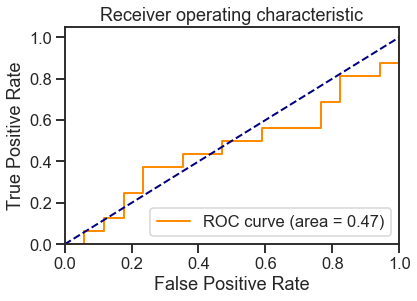

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6 

Best #estimators: 140 

Best max depth: None 



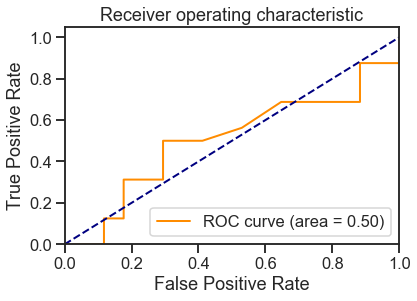

[[16  1]
 [16  0]]


              precision    recall  f1-score   support

           0       0.50      0.94      0.65        17
           1       0.00      0.00      0.00        16

    accuracy                           0.48        33
   macro avg       0.25      0.47      0.33        33
weighted avg       0.26      0.48      0.34        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.484848
mutual information: 0.011293617926818914
AE 2 clusters -  silhoutte score: 0.02760105136578615
AE 3 clusters -  silhoutte score: 0.015199459606273212
AE 4 clusters -  silhoutte score: 0.006601315651067885
AE 5 clusters -  silhoutte score: -0.0005768632585529567
AE 6 clusters -  silhoutte score: 0.00923454041869727


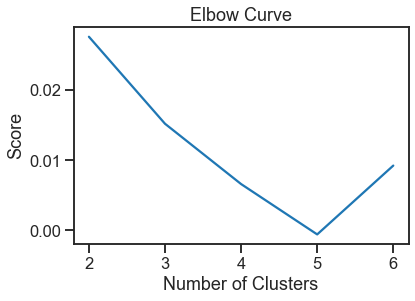

mutual information: 0.002442582120990477
AE 2 clusters -  silhoutte score: 0.01879584043193039
AE 3 clusters -  silhoutte score: 0.0007686932154220894
AE 4 clusters -  silhoutte score: -0.005116397435056084
AE 5 clusters -  silhoutte score: -0.0009825960971133923
AE 6 clusters -  silhoutte score: -0.00869491384748491


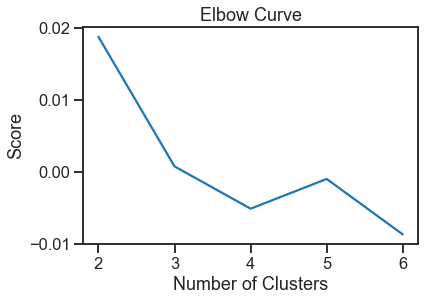

mutual information: 0.003786771297404444
AE 2 clusters -  silhoutte score: 0.012928602492203577
AE 3 clusters -  silhoutte score: -0.015532111596383966
AE 4 clusters -  silhoutte score: -0.011352003893543138
AE 5 clusters -  silhoutte score: -0.009691353543549474
AE 6 clusters -  silhoutte score: -0.006927865284799255


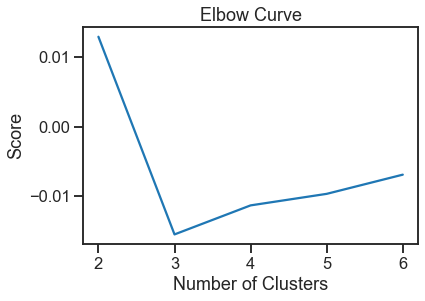

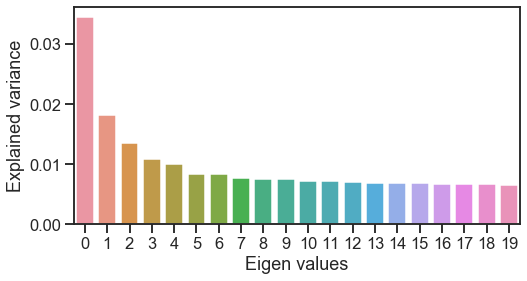

0.0955806235528878


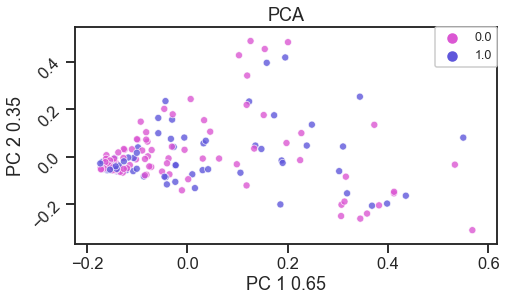

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



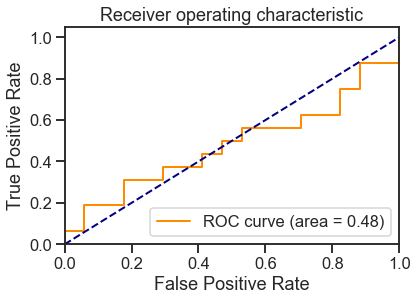

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



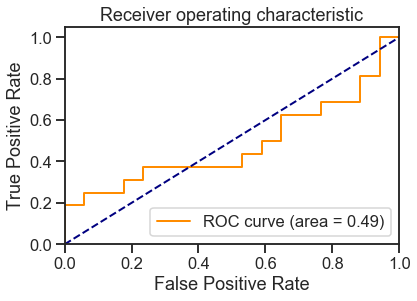

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6076923076923076 

Best #estimators: 140 

Best max depth: None 



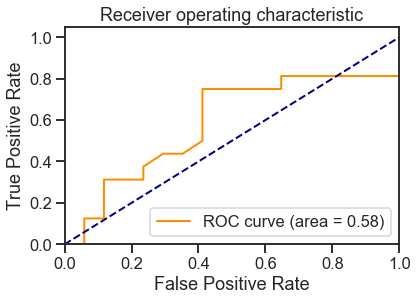

[[16  1]
 [14  2]]


              precision    recall  f1-score   support

           0       0.53      0.94      0.68        17
           1       0.67      0.12      0.21        16

    accuracy                           0.55        33
   macro avg       0.60      0.53      0.45        33
weighted avg       0.60      0.55      0.45        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.545455
mutual information: 0.008102358509058064
AE 2 clusters -  silhoutte score: 0.015363341258943935
AE 3 clusters -  silhoutte score: 0.00753369037594859
AE 4 clusters -  silhoutte score: 0.007551822213638862
AE 5 clusters -  silhoutte score: 0.0022109069887963754
AE 6 clusters -  silhoutte score: 0.005566836050333796


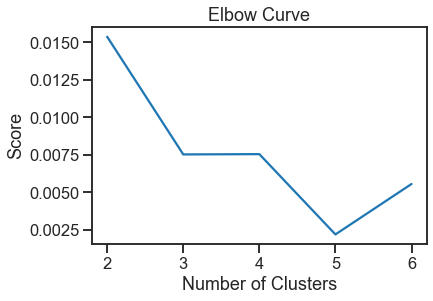

mutual information: 0.0019461823491796573
AE 2 clusters -  silhoutte score: 0.011526318909607302
AE 3 clusters -  silhoutte score: 0.001351233783479466
AE 4 clusters -  silhoutte score: 0.0007347070411240516
AE 5 clusters -  silhoutte score: 0.00030203254665180014
AE 6 clusters -  silhoutte score: 0.0014424054936858423


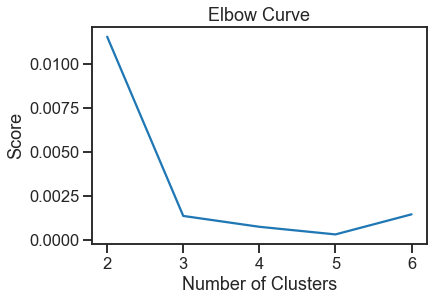

mutual information: 2.6407758711680518e-05
AE 2 clusters -  silhoutte score: 0.007288635082093301
AE 3 clusters -  silhoutte score: -0.0017273112537313964
AE 4 clusters -  silhoutte score: 0.00039540092137901065
AE 5 clusters -  silhoutte score: -0.0012984856070020812
AE 6 clusters -  silhoutte score: 6.559910407857656e-05


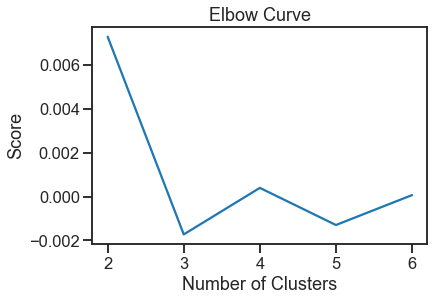

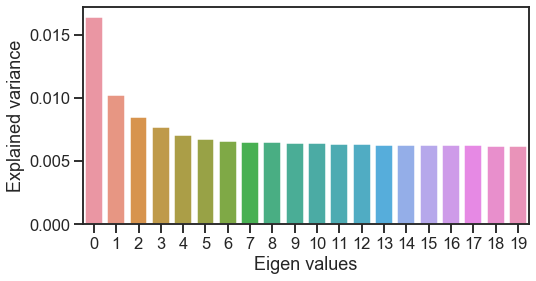

0.056633774095820794


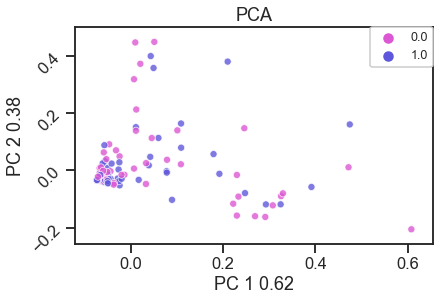

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



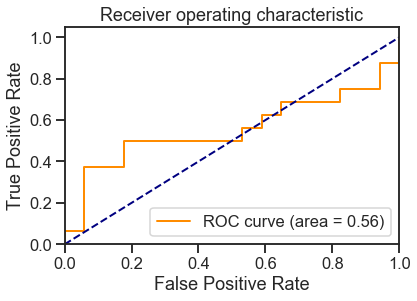

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152
Best score for training data:

C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



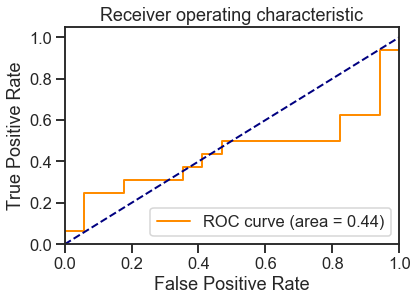

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6230769230769231 

Best #estimators: 100 

Best max depth: 12 



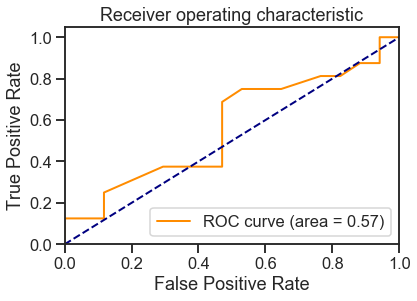

[[16  1]
 [14  2]]


              precision    recall  f1-score   support

           0       0.53      0.94      0.68        17
           1       0.67      0.12      0.21        16

    accuracy                           0.55        33
   macro avg       0.60      0.53      0.45        33
weighted avg       0.60      0.55      0.45        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.545455
mutual information: 0.011774990081698737
AE 2 clusters -  silhoutte score: 0.0025811010900375687
AE 3 clusters -  silhoutte score: 0.0014000303688671207
AE 4 clusters -  silhoutte score: 1.2199379634351409e-05
AE 5 clusters -  silhoutte score: 0.0026594807282447315
AE 6 clusters -  silhoutte score: 0.001407150645169047


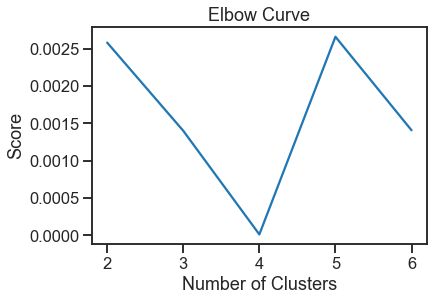

mutual information: 1.3366247970927724e-05
AE 2 clusters -  silhoutte score: 0.002837103526672401
AE 3 clusters -  silhoutte score: 0.0025158714561857396
AE 4 clusters -  silhoutte score: 0.0013208209379824791
AE 5 clusters -  silhoutte score: -0.0003604693427145816
AE 6 clusters -  silhoutte score: 0.000116820875161364


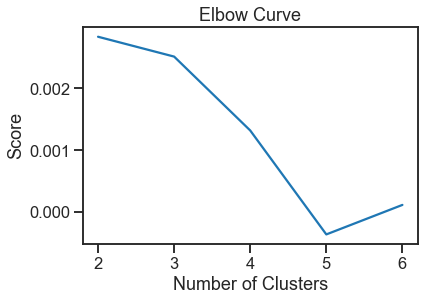

mutual information: 0.0007109140670443249
AE 2 clusters -  silhoutte score: 0.0028202478475652846
AE 3 clusters -  silhoutte score: 0.0030580937283171163
AE 4 clusters -  silhoutte score: 0.002876928179883524
AE 5 clusters -  silhoutte score: 0.0025564216794320875
AE 6 clusters -  silhoutte score: 3.4133203056472893e-06


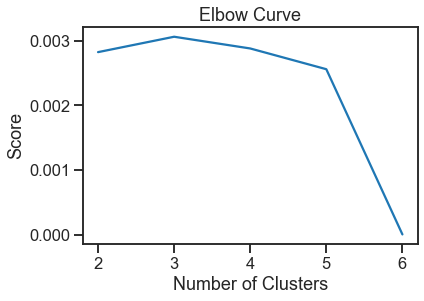

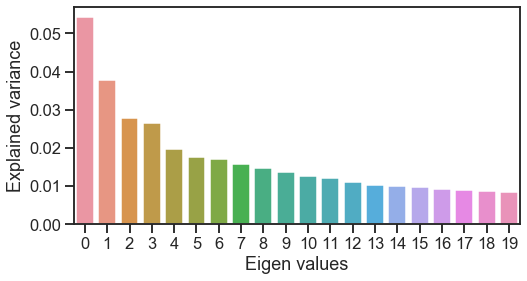

0.18384073533085282


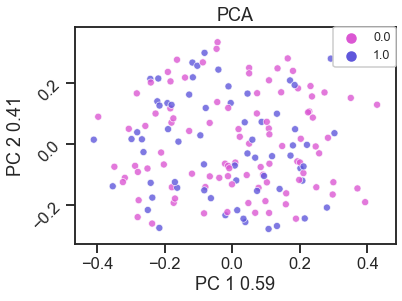

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



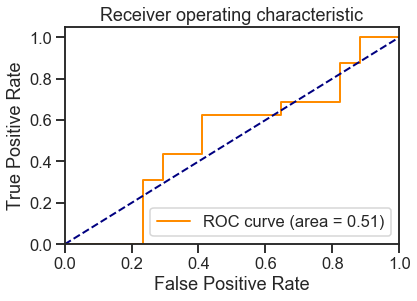

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



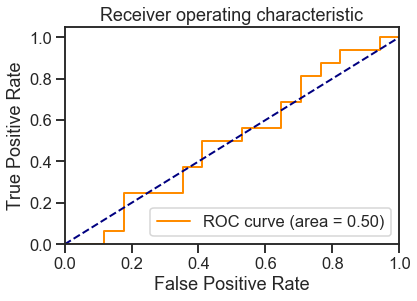

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6 

Best #estimators: 140 

Best max depth: None 



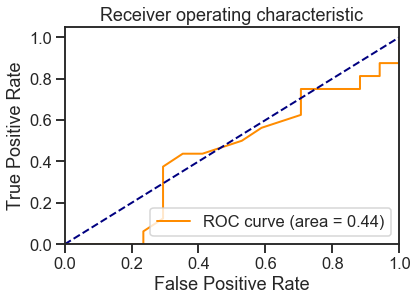

[[15  2]
 [16  0]]


              precision    recall  f1-score   support

           0       0.48      0.88      0.62        17
           1       0.00      0.00      0.00        16

    accuracy                           0.45        33
   macro avg       0.24      0.44      0.31        33
weighted avg       0.25      0.45      0.32        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.454545
mutual information: 0.0014764150301807462
AE 2 clusters -  silhoutte score: 0.03920832354697506
AE 3 clusters -  silhoutte score: 0.022897113170448524
AE 4 clusters -  silhoutte score: 0.0035484357107225355
AE 5 clusters -  silhoutte score: -0.0057004465282490605
AE 6 clusters -  silhoutte score: -0.0009754035948287298


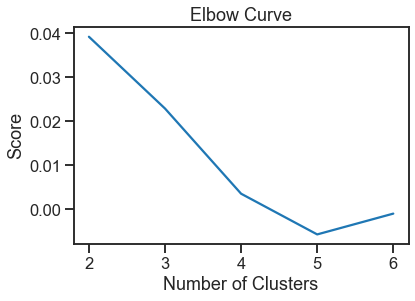

mutual information: 0.004413113351548187
AE 2 clusters -  silhoutte score: 0.02888173501922326
AE 3 clusters -  silhoutte score: 0.002524198827110824
AE 4 clusters -  silhoutte score: -0.002746434180745768
AE 5 clusters -  silhoutte score: 0.005273456865059785
AE 6 clusters -  silhoutte score: -0.00048477737112886856


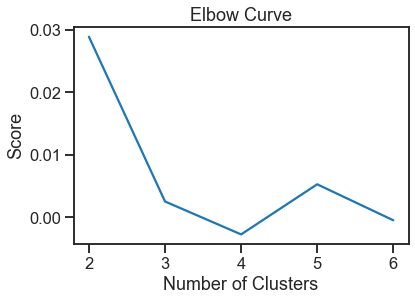

mutual information: 0.0031077782253402055
AE 2 clusters -  silhoutte score: 0.033552301417276074
AE 3 clusters -  silhoutte score: -0.0010601954245220075
AE 4 clusters -  silhoutte score: 0.005355240713493283
AE 5 clusters -  silhoutte score: 0.008754402165492064
AE 6 clusters -  silhoutte score: -0.0027432291223914314


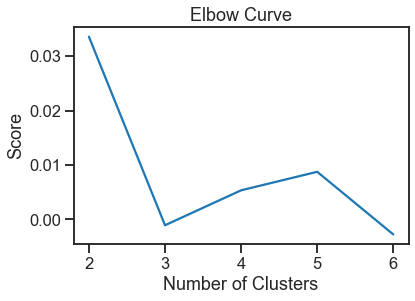

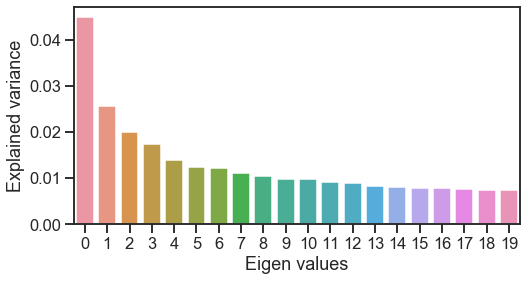

0.13400710865272397


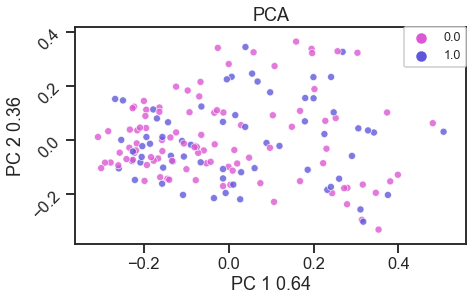

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



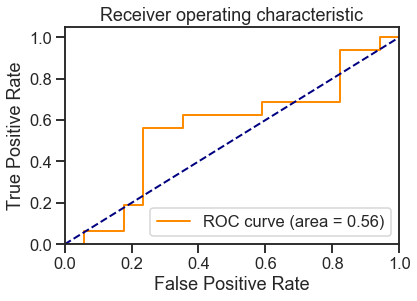

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



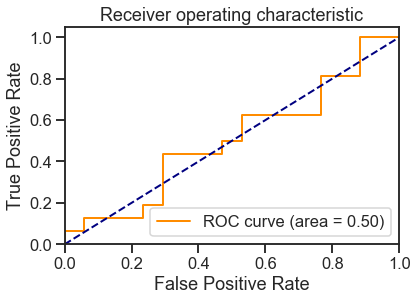

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.5923076923076922 

Best #estimators: 140 

Best max depth: None 



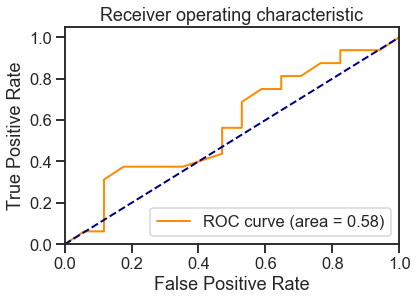

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.515152
mutual information: 0.005486374959715576
AE 2 clusters -  silhoutte score: 0.02451070680721922
AE 3 clusters -  silhoutte score: 0.011542340493300333
AE 4 clusters -  silhoutte score: -0.001363807909285806

C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



AE 5 clusters -  silhoutte score: -0.0008750074410195643
AE 6 clusters -  silhoutte score: -0.002708671996770629


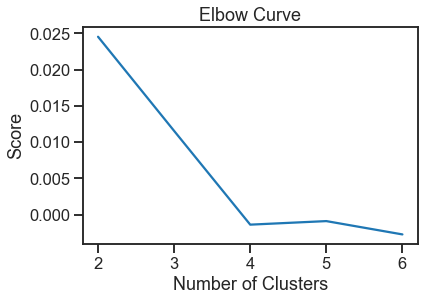

mutual information: 0.001288337833381289
AE 2 clusters -  silhoutte score: 0.013761100883686164
AE 3 clusters -  silhoutte score: -0.00035062675122201806
AE 4 clusters -  silhoutte score: -0.005666810878500454
AE 5 clusters -  silhoutte score: -0.0033076206467829755
AE 6 clusters -  silhoutte score: -0.0040530971059356095


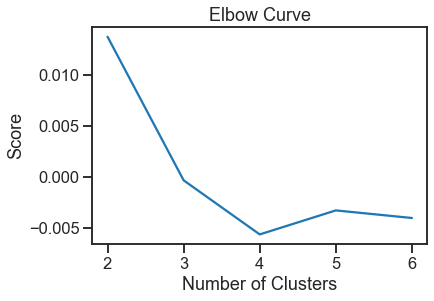

mutual information: 0.00108871319121822
AE 2 clusters -  silhoutte score: 0.01798101062809802
AE 3 clusters -  silhoutte score: -0.005845930501202357
AE 4 clusters -  silhoutte score: -0.002620687702250514
AE 5 clusters -  silhoutte score: -0.0022935043900054733
AE 6 clusters -  silhoutte score: -0.0006245467643933679


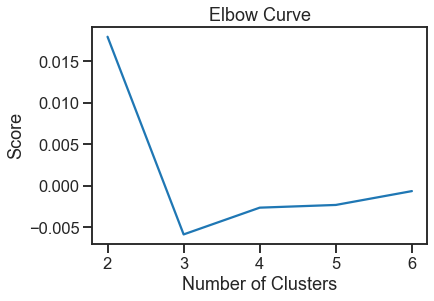

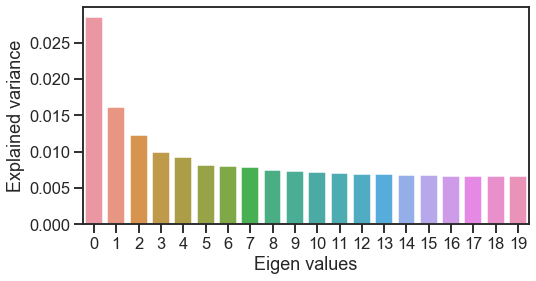

0.08442833575464151


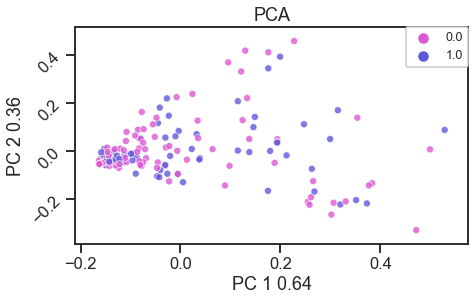

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



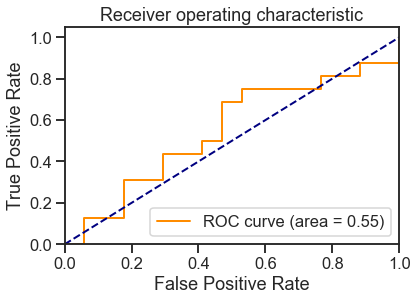

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



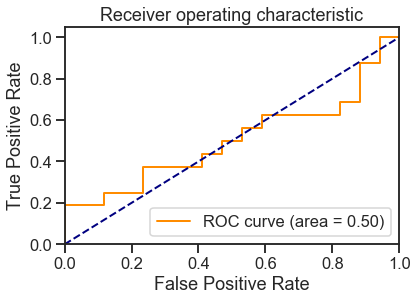

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.5923076923076923 

Best #estimators: 100 

Best max depth: 12 



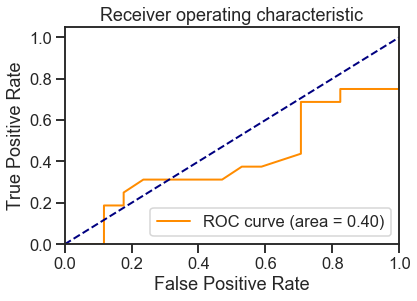

[[15  2]
 [16  0]]


              precision    recall  f1-score   support

           0       0.48      0.88      0.62        17
           1       0.00      0.00      0.00        16

    accuracy                           0.45        33
   macro avg       0.24      0.44      0.31        33
weighted avg       0.25      0.45      0.32        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.454545
mutual information: 0.012568627982385628
AE 2 clusters -  silhoutte score: 0.01300292330199238
AE 3 clusters -  silhoutte score: 0.0019605991949632924
AE 4 clusters -  silhoutte score: 0.002778904673966859
AE 5 clusters -  silhoutte score: 0.002365617147249554
AE 6 clusters -  silhoutte score: 0.0023852069510940915


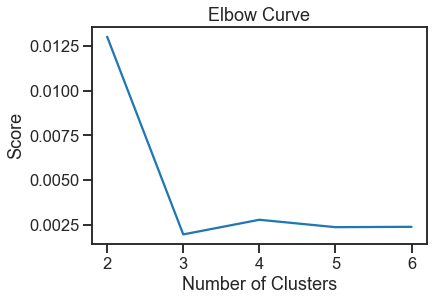

mutual information: 0.0019461823491796573
AE 2 clusters -  silhoutte score: 0.008749866451330135
AE 3 clusters -  silhoutte score: 0.0005638877347758692
AE 4 clusters -  silhoutte score: 0.0005880840507855064
AE 5 clusters -  silhoutte score: 7.017034547113391e-06
AE 6 clusters -  silhoutte score: 0.0005047788144595736


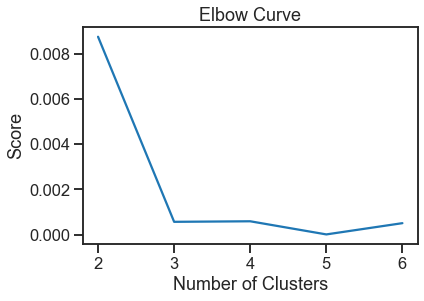

mutual information: 0.0020808977680483345
AE 2 clusters -  silhoutte score: 0.008461007848760919
AE 3 clusters -  silhoutte score: -0.0009227379556176103
AE 4 clusters -  silhoutte score: -0.0017364268944331364
AE 5 clusters -  silhoutte score: -0.0004670152361541506
AE 6 clusters -  silhoutte score: 0.00016277442465288468


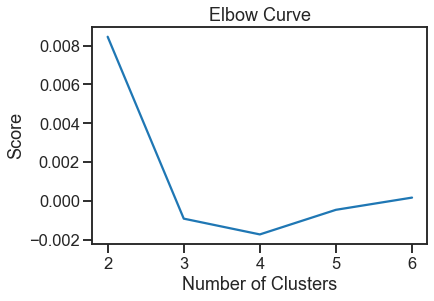

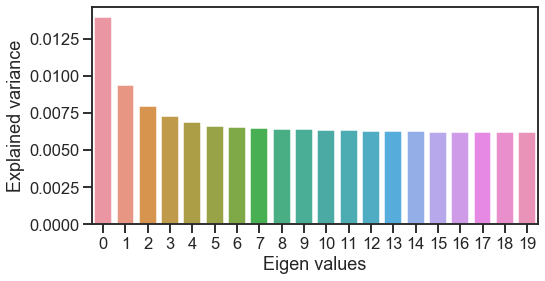

0.052165132417978904


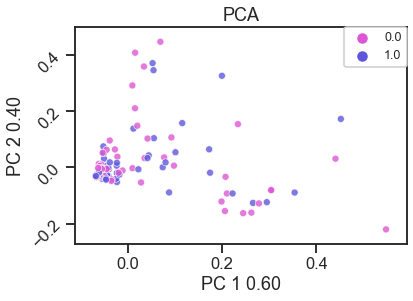

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



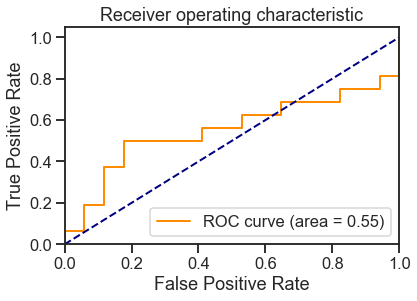

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



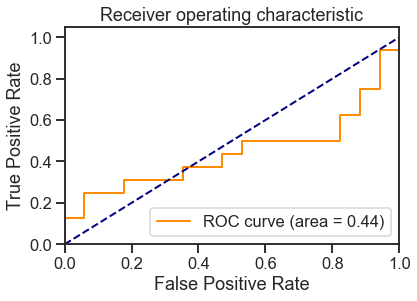

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6230769230769231 

Best #estimators: 140 

Best max depth: None 



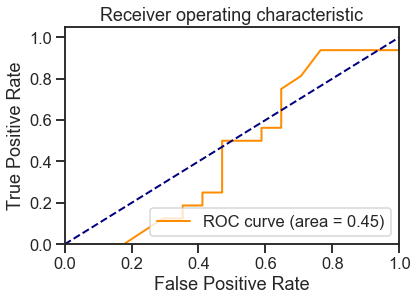

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.515152
mutual information: 0.005359225348746703
AE 2 clusters -  silhoutte score: 0.0022354086809667512
AE 3 clusters -  silhoutte score: -8.732398925733408e-05
AE 4 clusters -  silhoutte score: -6.4651150367846296e-06
AE 5 clusters -  silhoutte score: 0.0020204988422900514


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AE 6 clusters -  silhoutte score: 0.0006750631620185087


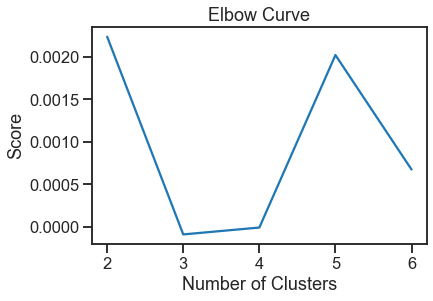

mutual information: 1.3366247970927724e-05
AE 2 clusters -  silhoutte score: 0.0020675837046512844
AE 3 clusters -  silhoutte score: 0.0016932219271556998
AE 4 clusters -  silhoutte score: 0.0010567231681592537
AE 5 clusters -  silhoutte score: -0.00013844903469391152
AE 6 clusters -  silhoutte score: -9.69823026637669e-05


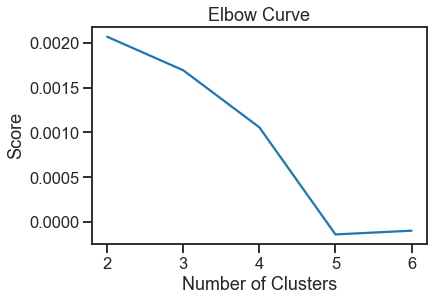

mutual information: 0.0007109140670443249
AE 2 clusters -  silhoutte score: 0.002048764704531555
AE 3 clusters -  silhoutte score: 0.002117762383589303
AE 4 clusters -  silhoutte score: 0.001812009286562566
AE 5 clusters -  silhoutte score: 0.002110644348557004
AE 6 clusters -  silhoutte score: -1.4057578133688423e-06


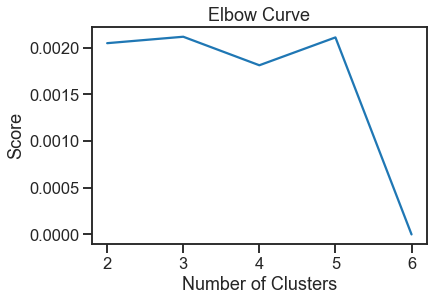

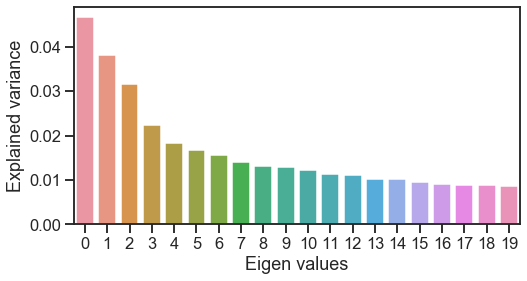

0.17387257559634034


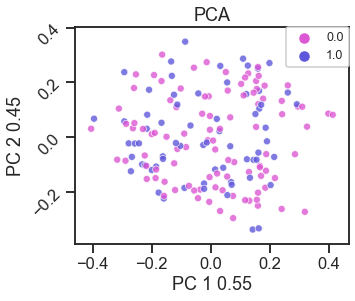

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



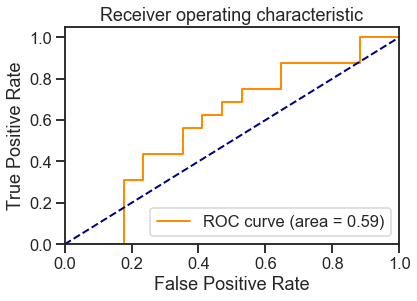

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



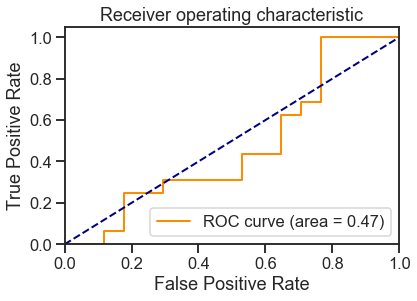

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6307692307692307 

Best #estimators: 100 

Best max depth: 12 



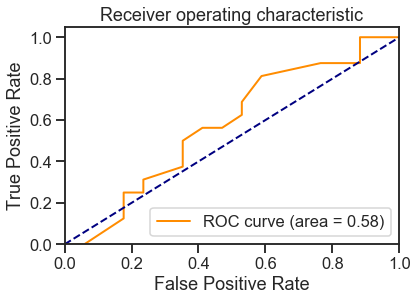

[[16  1]
 [16  0]]


              precision    recall  f1-score   support

           0       0.50      0.94      0.65        17
           1       0.00      0.00      0.00        16

    accuracy                           0.48        33
   macro avg       0.25      0.47      0.33        33
weighted avg       0.26      0.48      0.34        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.484848
mutual information: 0.0011271888250675177
AE 2 clusters -  silhoutte score: 0.03789508534189452
AE 3 clusters -  silhoutte score: 0.0014658027573161963
AE 4 clusters -  silhoutte score: 0.005721241237762209
AE 5 clusters -  silhoutte score: 0.0026077702298400412
AE 6 clusters -  silhoutte score: 0.0011611317732889257


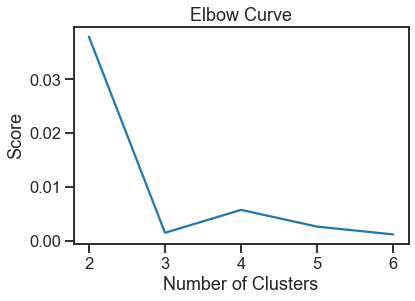

mutual information: 0.006531127283814477
AE 2 clusters -  silhoutte score: 0.020097996587946417
AE 3 clusters -  silhoutte score: 0.014988041202589444
AE 4 clusters -  silhoutte score: -0.002875465219211637
AE 5 clusters -  silhoutte score: 0.0028324779354063903
AE 6 clusters -  silhoutte score: -0.006246706626796194


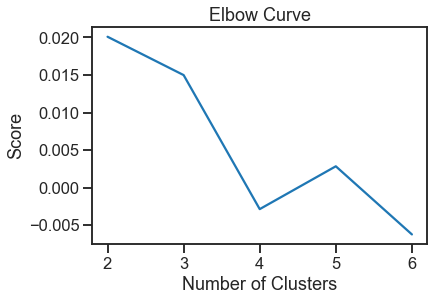

mutual information: 0.00010307398525461073
AE 2 clusters -  silhoutte score: 0.01965140277311093
AE 3 clusters -  silhoutte score: 0.02217032404384702
AE 4 clusters -  silhoutte score: -0.004469653816793017
AE 5 clusters -  silhoutte score: -0.0012527026784902818
AE 6 clusters -  silhoutte score: 0.0011479794472836523


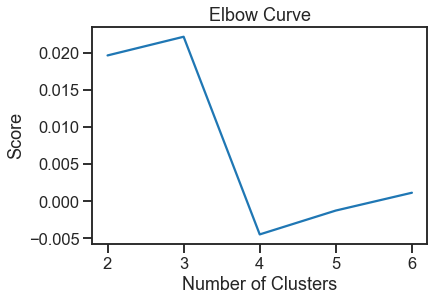

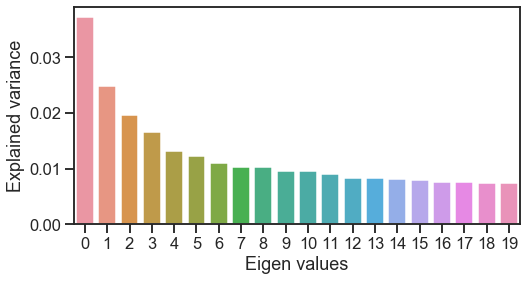

0.12388696780601392


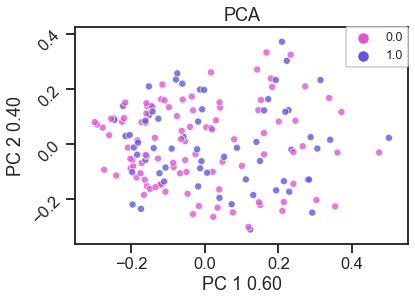

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



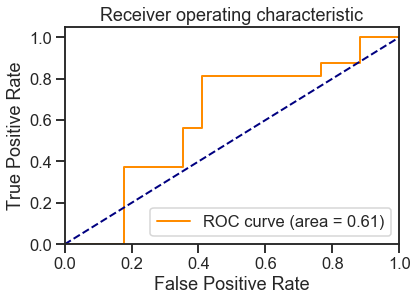

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



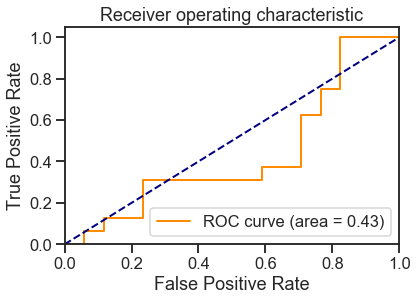

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.5846153846153845 

Best #estimators: 100 

Best max depth: 12 



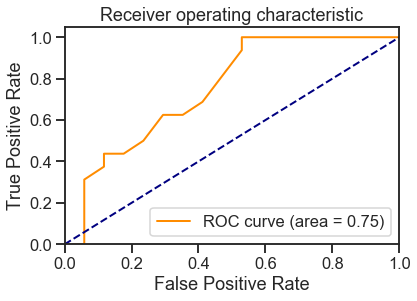

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.515152
mutual information: 0.004763108115744829
AE 2 clusters -  silhoutte score: 0.00844248889048844
AE 3 clusters -  silhoutte score: 0.007897420432063693
AE 4 clusters -  silhoutte score: 5.413108896211072e-05


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AE 5 clusters -  silhoutte score: 0.005469285027289146
AE 6 clusters -  silhoutte score: 0.0028257806974420737


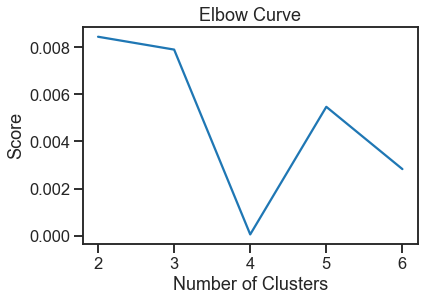

mutual information: 0.007351137404735543
AE 2 clusters -  silhoutte score: 0.011326035580482726
AE 3 clusters -  silhoutte score: -0.0030192432864869934
AE 4 clusters -  silhoutte score: 0.0004049856943827722
AE 5 clusters -  silhoutte score: -0.0007459193957916697
AE 6 clusters -  silhoutte score: -0.00572373665164883


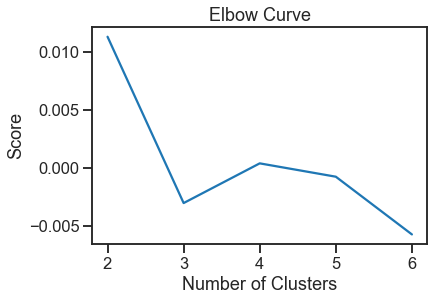

mutual information: 1.775529569749986e-06
AE 2 clusters -  silhoutte score: 0.01649074627657319
AE 3 clusters -  silhoutte score: -0.002988407784675797
AE 4 clusters -  silhoutte score: 0.0011280495723135606
AE 5 clusters -  silhoutte score: 0.0007515327488334054
AE 6 clusters -  silhoutte score: -0.004857767975520539


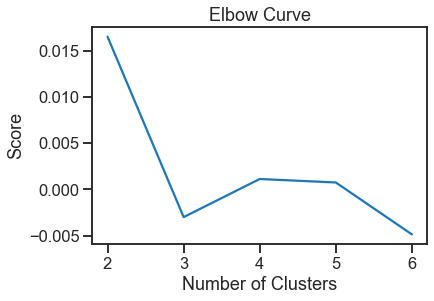

C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\utils\extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


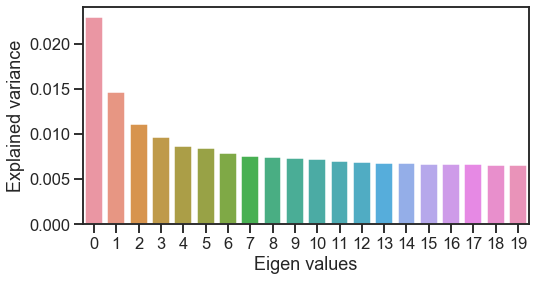

0.07542157188014861


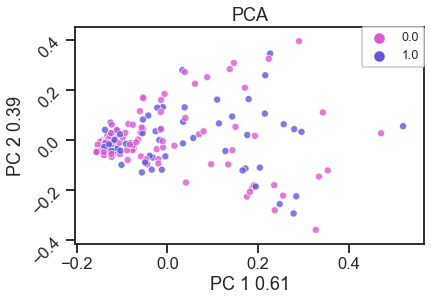

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



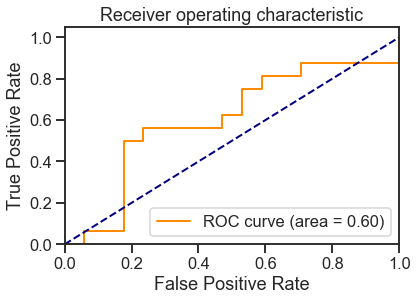

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



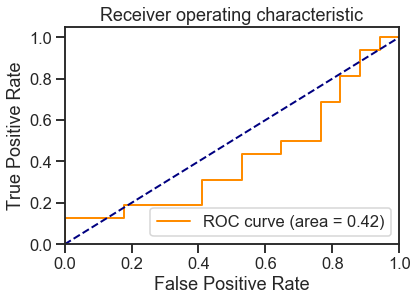

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6 

Best #estimators: 140 

Best max depth: None 



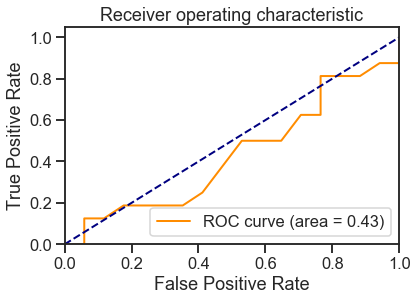

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.515152
mutual information: 0.01925096578471924
AE 2 clusters -  silhoutte score: 0.008884694103404195
AE 3 clusters -  silhoutte score: 0.0035595605353544515
AE 4 clusters -  silhoutte score: 0.003916772814885048
AE 5 clusters -  silhoutte score: -0.0004986243242249918


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AE 6 clusters -  silhoutte score: 0.0014389010792142014


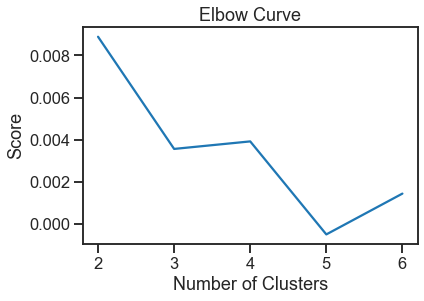

mutual information: 0.002984675027842324
AE 2 clusters -  silhoutte score: 0.005890201997789552
AE 3 clusters -  silhoutte score: 0.0009837304984246019
AE 4 clusters -  silhoutte score: -0.00030331753719176644
AE 5 clusters -  silhoutte score: -0.0018879658300221304
AE 6 clusters -  silhoutte score: 0.0011557537451817928


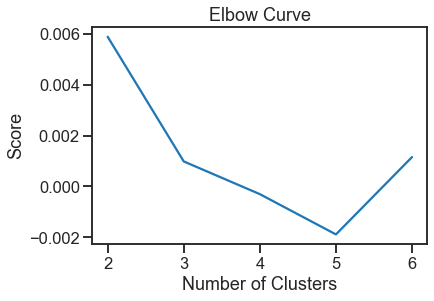

mutual information: 4.509001604441701e-05
AE 2 clusters -  silhoutte score: 0.00788489135443671
AE 3 clusters -  silhoutte score: 0.000421361616469068
AE 4 clusters -  silhoutte score: -0.0011449000982481827
AE 5 clusters -  silhoutte score: -0.0028972046919328483
AE 6 clusters -  silhoutte score: -0.0020799456555741238


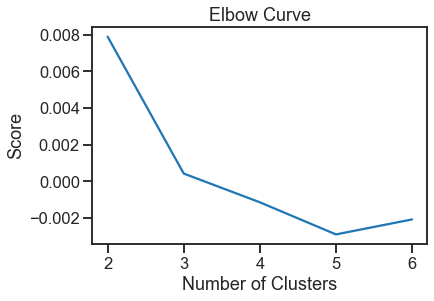

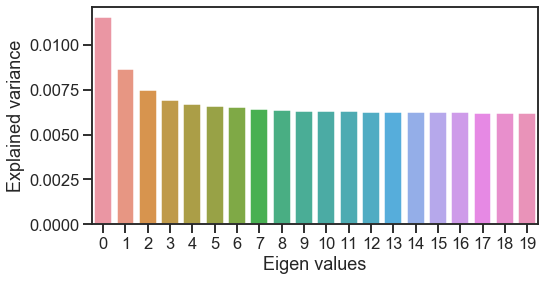

0.04790215650022798


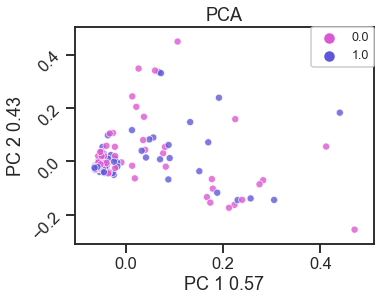

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



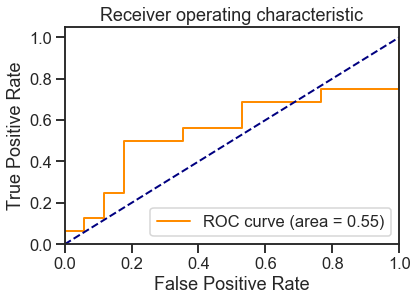

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



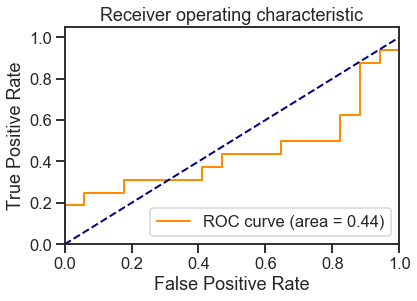

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.5769230769230769 

Best #estimators: 100 

Best max depth: 12 



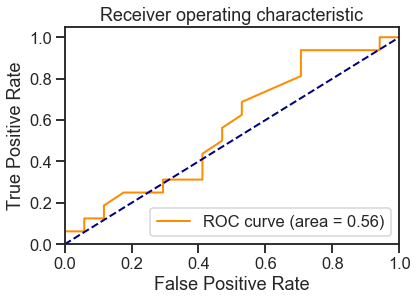

[[17  0]
 [15  1]]


              precision    recall  f1-score   support

           0       0.53      1.00      0.69        17
           1       1.00      0.06      0.12        16

    accuracy                           0.55        33
   macro avg       0.77      0.53      0.41        33
weighted avg       0.76      0.55      0.41        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.545455
mutual information: 0.008831201965749502
AE 2 clusters -  silhoutte score: 0.0016548889484065004
AE 3 clusters -  silhoutte score: 9.057419086274357e-05
AE 4 clusters -  silhoutte score: 0.00019194991542773835
AE 5 clusters -  silhoutte score: 0.0011118945835260595
AE 6 clusters -  silhoutte score: 0.001454996157990024


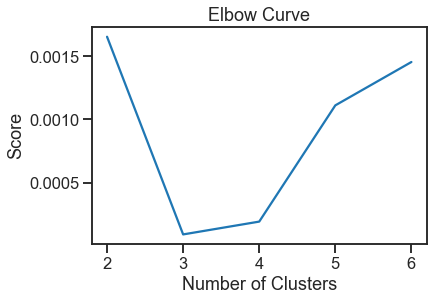

mutual information: 1.0572272808670566e-05
AE 2 clusters -  silhoutte score: 0.0013259005401238704
AE 3 clusters -  silhoutte score: 0.0008198393921960584
AE 4 clusters -  silhoutte score: 0.0008186810231805591
AE 5 clusters -  silhoutte score: -0.00023459584284804853
AE 6 clusters -  silhoutte score: -4.6179732452979954e-05


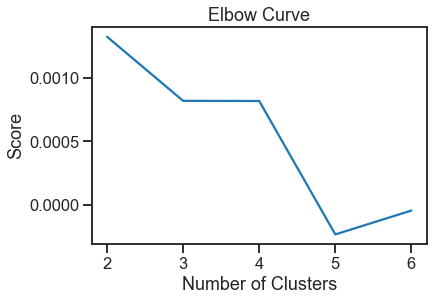

mutual information: 0.0007109140670443249
AE 2 clusters -  silhoutte score: 0.0013002049479377796
AE 3 clusters -  silhoutte score: 0.0007636879139257723
AE 4 clusters -  silhoutte score: 0.0010874362975283652
AE 5 clusters -  silhoutte score: 0.0010645480474162547
AE 6 clusters -  silhoutte score: -0.0003295147905566179


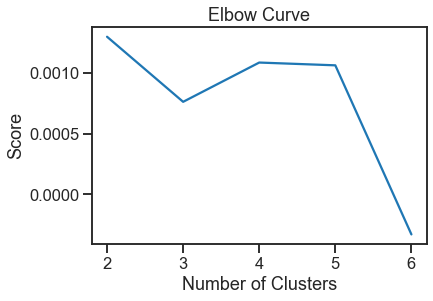

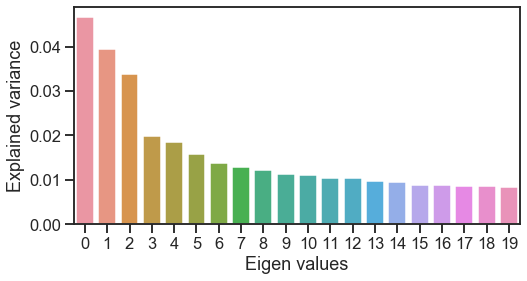

0.1740566262953556


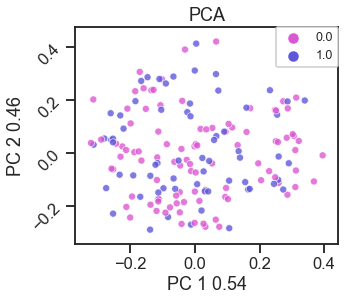

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



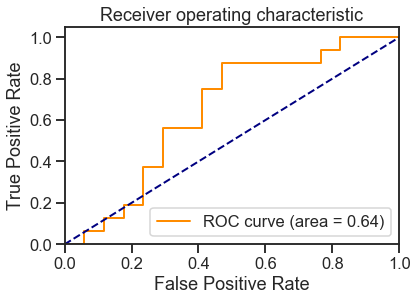

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152
Best score for training data:

C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



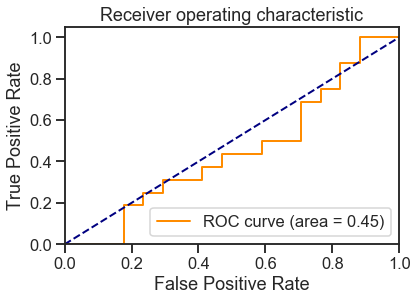

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6307692307692309 

Best #estimators: 100 

Best max depth: 12 



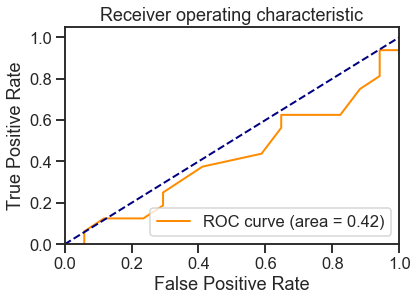

[[16  1]
 [15  1]]


              precision    recall  f1-score   support

           0       0.52      0.94      0.67        17
           1       0.50      0.06      0.11        16

    accuracy                           0.52        33
   macro avg       0.51      0.50      0.39        33
weighted avg       0.51      0.52      0.40        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.515152
mutual information: 0.002664171008573006
AE 2 clusters -  silhoutte score: 0.05336633812619427
AE 3 clusters -  silhoutte score: 0.017022556478700036
AE 4 clusters -  silhoutte score: 0.014069027682012408
AE 5 clusters -  silhoutte score: -0.003920278161858088
AE 6 clusters -  silhoutte score: -0.003500542546394288


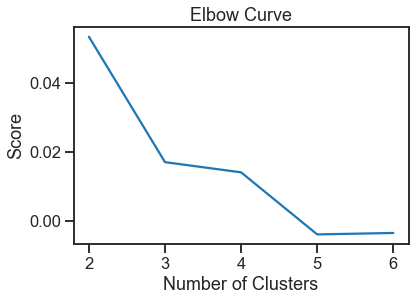

mutual information: 2.955626150159889e-05
AE 2 clusters -  silhoutte score: 0.03707095500841371
AE 3 clusters -  silhoutte score: 0.010066654820198563
AE 4 clusters -  silhoutte score: 0.001568306175144077
AE 5 clusters -  silhoutte score: -0.003411079558381242
AE 6 clusters -  silhoutte score: 0.000915646600534628


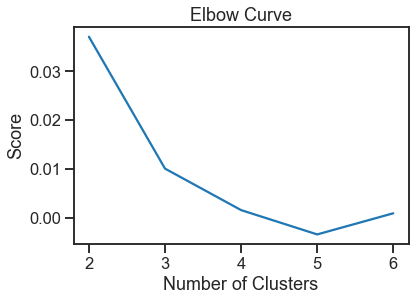

mutual information: 0.0022695392641251563
AE 2 clusters -  silhoutte score: 0.0557761341523069
AE 3 clusters -  silhoutte score: 0.006920734646118435
AE 4 clusters -  silhoutte score: 0.0022761565369011478
AE 5 clusters -  silhoutte score: 0.00514631692085256
AE 6 clusters -  silhoutte score: 0.008242531605123136


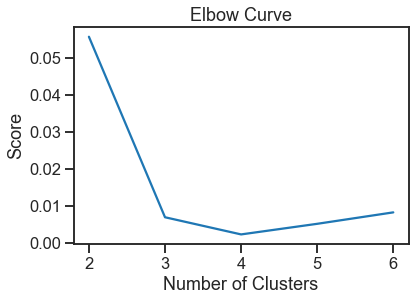

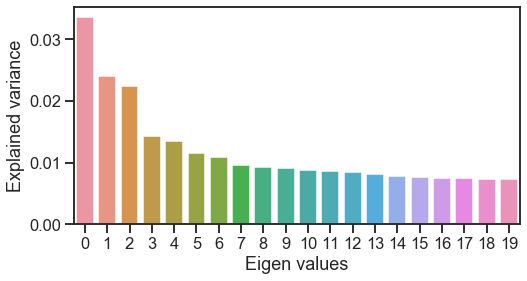

0.11938949495474545


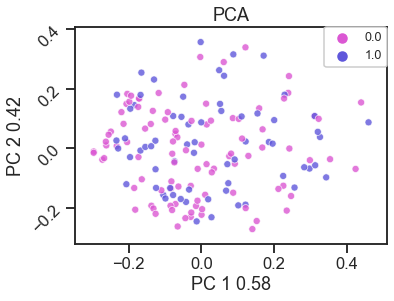

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



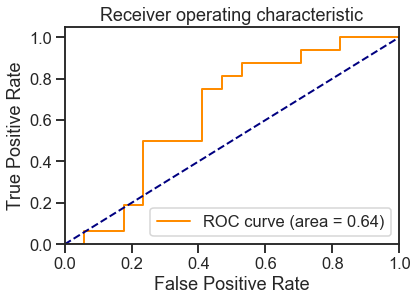

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152
Best score for training data:

C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



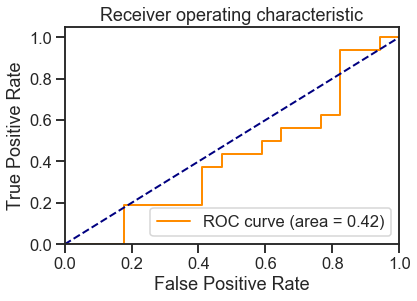

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6 

Best #estimators: 140 

Best max depth: None 



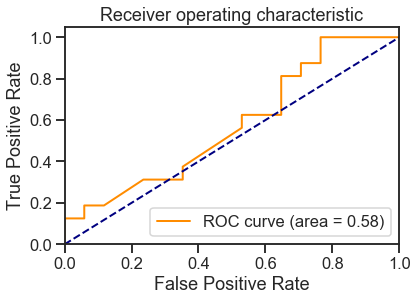

[[17  0]
 [14  2]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        17
           1       1.00      0.12      0.22        16

    accuracy                           0.58        33
   macro avg       0.77      0.56      0.47        33
weighted avg       0.77      0.58      0.47        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.575758
mutual information: 0.005777388518024191
AE 2 clusters -  silhoutte score: 0.009012831292392349
AE 3 clusters -  silhoutte score: 0.005969074212003391
AE 4 clusters -  silhoutte score: 0.006656675981400673
AE 5 clusters -  silhoutte score: 0.0021862175135111453
AE 6 clusters -  silhoutte score: 0.001982922403367046


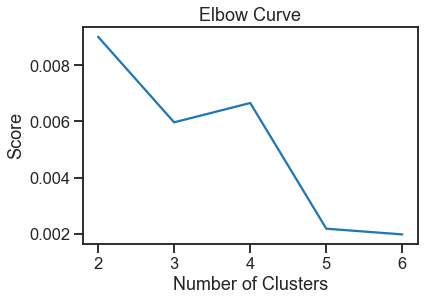

mutual information: 0.013212409049778896
AE 2 clusters -  silhoutte score: 0.010493540214197773
AE 3 clusters -  silhoutte score: 0.0017537490928202482
AE 4 clusters -  silhoutte score: 0.0012609814903235903
AE 5 clusters -  silhoutte score: -0.006208012350298211
AE 6 clusters -  silhoutte score: -0.004240703347606011


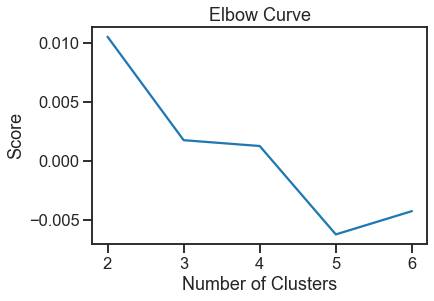

mutual information: 0.00010307398525461073
AE 2 clusters -  silhoutte score: 0.011919621854368491
AE 3 clusters -  silhoutte score: 0.01358509909198729
AE 4 clusters -  silhoutte score: 0.003917804656648037
AE 5 clusters -  silhoutte score: -0.006662015635889513
AE 6 clusters -  silhoutte score: -0.006421636614320557


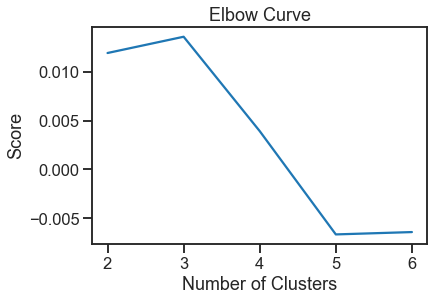

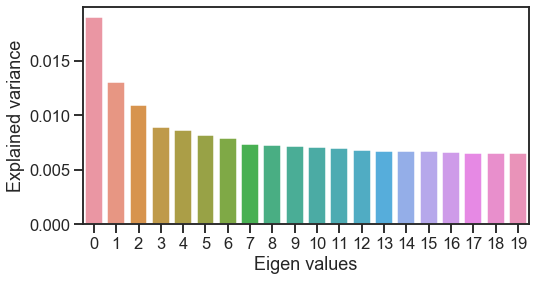

0.06870382368208654


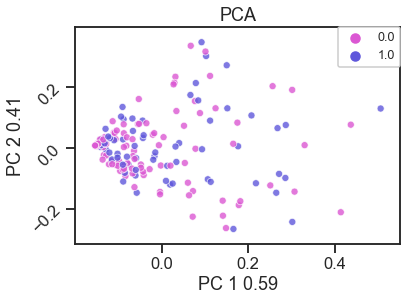

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



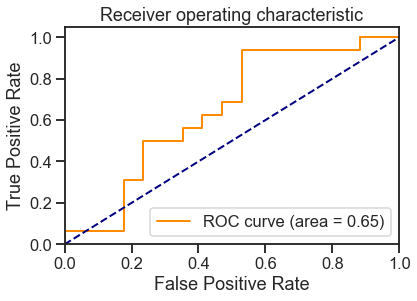

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



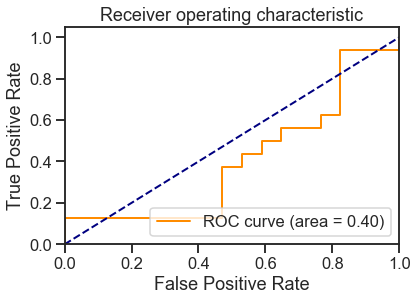

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6230769230769231 

Best #estimators: 100 

Best max depth: 12 



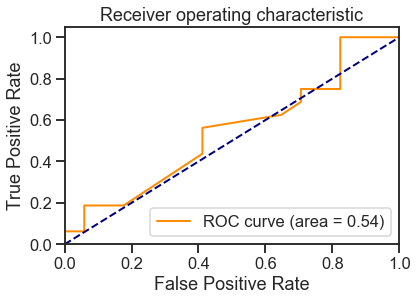

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.515152
mutual information: 0.005416641727255405
AE 2 clusters -  silhoutte score: 0.004426515033372082
AE 3 clusters -  silhoutte score: 0.0025464414916483457
AE 4 clusters -  silhoutte score: 0.0018154296218385962
AE 5 clusters -  silhoutte score: 0.0015540833583947385


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AE 6 clusters -  silhoutte score: -0.0006927970510918485


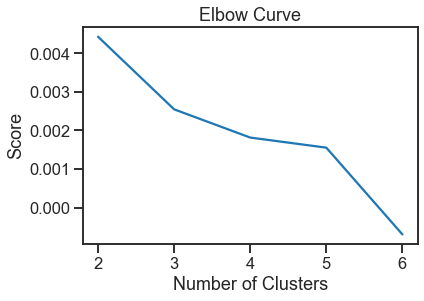

mutual information: 0.006329603996851997
AE 2 clusters -  silhoutte score: 0.00322183442854956
AE 3 clusters -  silhoutte score: -0.0010547134118974013
AE 4 clusters -  silhoutte score: -0.0019060801980632033
AE 5 clusters -  silhoutte score: -0.0007342654071716313
AE 6 clusters -  silhoutte score: -0.0025282268529369114


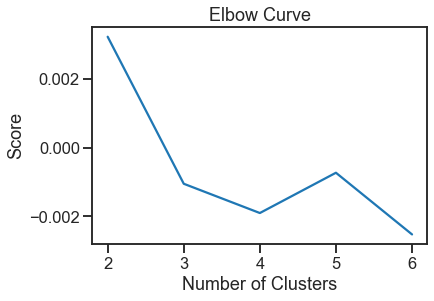

mutual information: 3.0446970579068755e-05
AE 2 clusters -  silhoutte score: 0.002042715650005168
AE 3 clusters -  silhoutte score: -0.0020151282542626207
AE 4 clusters -  silhoutte score: -0.0012296584525579128
AE 5 clusters -  silhoutte score: -0.00022879620015068676
AE 6 clusters -  silhoutte score: -0.0037653525106692265


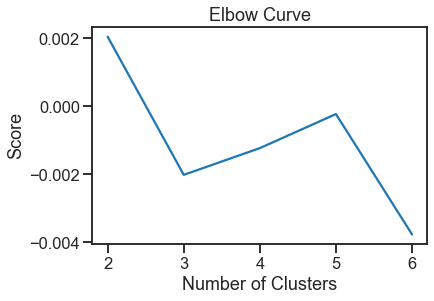

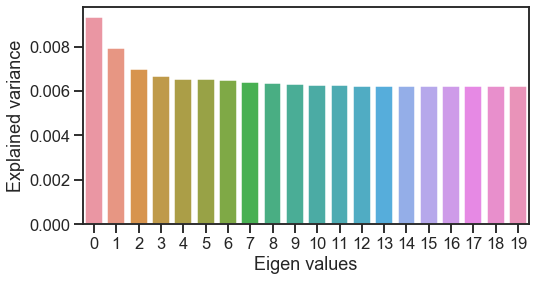

0.04400273422578262


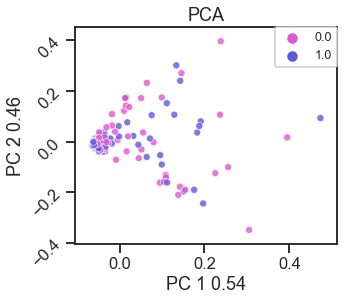

Results for AE: 

Best score for training data: 0.6153846153846154 

Best C: 0.08 



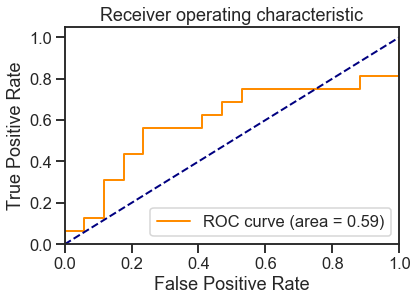

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6153846153846154 

Best C: 0.1 

Best Gamma: scale 



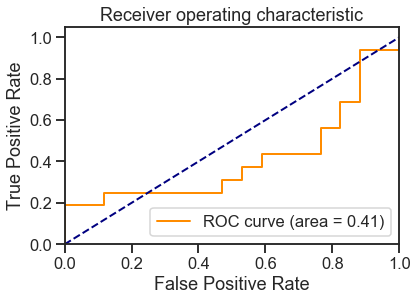

[[17  0]
 [16  0]]


              precision    recall  f1-score   support

           0       0.52      1.00      0.68        17
           1       0.00      0.00      0.00        16

    accuracy                           0.52        33
   macro avg       0.26      0.50      0.34        33
weighted avg       0.27      0.52      0.35        33

Training set score for SVM: 0.615385
Testing  set score for SVM: 0.515152


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.5999999999999999 

Best #estimators: 100 

Best max depth: 12 



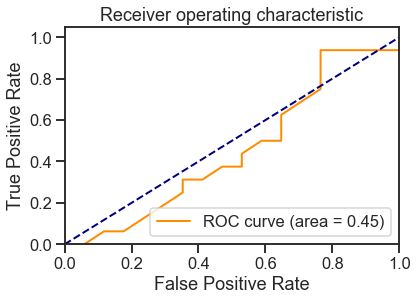

[[16  1]
 [16  0]]


              precision    recall  f1-score   support

           0       0.50      0.94      0.65        17
           1       0.00      0.00      0.00        16

    accuracy                           0.48        33
   macro avg       0.25      0.47      0.33        33
weighted avg       0.26      0.48      0.34        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.484848
mutual information: 0.009718588749310341
AE 2 clusters -  silhoutte score: 0.0009312653087226672
AE 3 clusters -  silhoutte score: 0.0005752631257007987
AE 4 clusters -  silhoutte score: -0.0003696188350727878
AE 5 clusters -  silhoutte score: -0.0011639162567285955
AE 6 clusters -  silhoutte score: 0.00023411180026528897


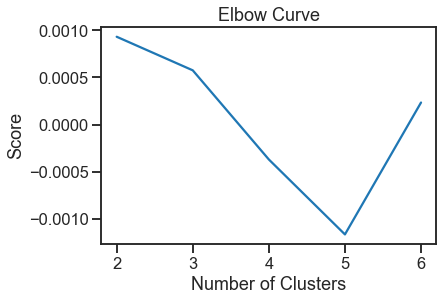

mutual information: 0.008224104765599316
AE 2 clusters -  silhoutte score: 0.0010663615451835
AE 3 clusters -  silhoutte score: 0.0006504290534753425
AE 4 clusters -  silhoutte score: -1.1203146049610498e-05
AE 5 clusters -  silhoutte score: -0.0005283924658839791
AE 6 clusters -  silhoutte score: -0.0003954876527925884


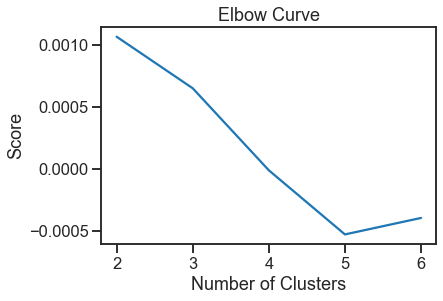

mutual information: 0.00033447450870840393
AE 2 clusters -  silhoutte score: 0.0006829874572069764
AE 3 clusters -  silhoutte score: 0.0007662056993739486
AE 4 clusters -  silhoutte score: 0.0005606634066550112
AE 5 clusters -  silhoutte score: 0.00019922434283344017
AE 6 clusters -  silhoutte score: -0.0008056758914664885


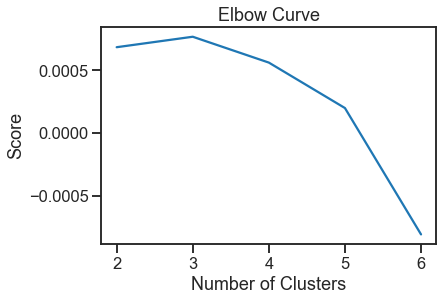

In [93]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# CONCAT TRAIN AND TEST DATASET TO TRANSFORM THE ENTIRE DATA
X_first = pd.concat([X_train_first_norm, X_test_first_norm], axis=0)
X_second = pd.concat([X_train_second_norm, X_test_second_norm], axis=0)
y = pd.concat([y_train, y_test], axis=0)

# Hyperparameters
gammas = [2**x/500 if x < 5 else round(2**x/100) for x in range(1,5)]
mus = [x/5 for x in range(1,5)]

results=[]

for mu in mus:
    for gamma in gammas:
        # Apply rbf kernel to divided datasets
        X_kpca, _ = Models.perform_multi_KPCA(X_first, X_second, y, gamma=gamma, mu=mu)

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_kpca, y, test_size=0.2, random_state=1) 
        ### CLASSIFICATION ###
        classify = Models.classify(X_train, X_test, np.ravel(y_train), np.ravel(y_test), model_type="AE")

        ### CLUSTERING ###
        clustering = Models.cluster(X_kpca,np.ravel(y), model_type="AE")
        
        results.append([mu,gamma] + classify + clustering)

In [94]:
scores = pd.DataFrame(results,
                     columns=["mu","gamma","LR_accuracy","SVM_accuracy", "RF_accuracy", "LR_auc", "SVM_auc", "RF_auc","kmeans_silhouette","kmeans_mutual_info","spectral_silhouette","spectral_mutual_info","hierarchical_silhouette","hierarchical_mutual_info"])    
scores

mu  gamma  LR_accuracy  SVM_accuracy  RF_accuracy    LR_auc   SVM_auc  \
0   0.2  0.004     0.515152      0.515152     0.515152  0.485294  0.466912   
1   0.2  0.008     0.515152      0.515152     0.484848  0.511029  0.466912   
2   0.2  0.016     0.515152      0.515152     0.545455  0.481618  0.485294   
3   0.2  0.032     0.515152      0.515152     0.545455  0.555147  0.441176   
4   0.4  0.004     0.515152      0.515152     0.454545  0.507353  0.503676   
5   0.4  0.008     0.515152      0.515152     0.515152  0.562500  0.503676   
6   0.4  0.016     0.515152      0.515152     0.454545  0.547794  0.503676   
7   0.4  0.032     0.515152      0.515152     0.515152  0.551471  0.444853   
8   0.6  0.004     0.515152      0.515152     0.484848  0.591912  0.470588   
9   0.6  0.008     0.515152      0.515152     0.515152  0.606618  0.430147   
10  0.6  0.016     0.515152      0.515152     0.515152  0.602941  0.415441   
11  0.6  0.032     0.515152      0.515152     0.545455  0.551471  0.444853   
12  0.8  0.004     0.515152      0.515152     0.515152  0.643382  0.448529   
13  0.8  0.008     0.515152      0.515152     0.575758  0.639706  0.419118   
14  0.8  0.016     0.515152      0.515152     0.515152  0.647059  0.404412   
15  0.8  0.032     0.515152      0.515152     0.484848  0.591912  0.411765   

      RF_auc  kmeans_silhouette  kmeans_mutual_info  spectral_silhouette  \
0   0.610294           0.047749            0.003578             0.035690   
1   0.503676           0.027601            0.011294             0.018796   
2   0.584559           0.015363            0.008102             0.011526   
3   0.566176           0.002581            0.011775             0.002837   
4   0.443015           0.039208            0.001476             0.028882   
5   0.575368           0.024511            0.005486             0.013761   
6   0.404412           0.013003            0.012569             0.008750   
7   0.450368           0.002235            0.005359             0.002068   
8   0.575368           0.037895            0.001127             0.020098   
9   0.748162           0.008442            0.004763             0.011326   
10  0.431985           0.008885            0.019251             0.005890   
11  0.564338           0.001655            0.008831             0.001326   
12  0.419118           0.053366            0.002664             0.037071   
13  0.575368           0.009013            0.005777             0.010494   
14  0.542279           0.004427            0.005417             0.003222   
15  0.452206           0.000931            0.009719             0.001066   

    spectral_mutual_info  hierarchical_silhouette  hierarchical_mutual_info  
0               0.003307                 0.021516                  0.003057  
1               0.002443                 0.012929                  0.003787  
2               0.001946                 0.007289                  0.000026  
3               0.000013                 0.002820                  0.000711  
4               0.004413                 0.033552                  0.003108  
5               0.001288                 0.017981                  0.001089  
6               0.001946                 0.008461                  0.002081  
7               0.000013                 0.002049                  0.000711  
8               0.006531                 0.019651                  0.000103  
9               0.007351                 0.016491                  0.000002  
10              0.002985                 0.007885                  0.000045  
11              0.000011                 0.001300                  0.000711  
12              0.000030                 0.055776                  0.002270  
13              0.013212                 0.011920                  0.000103  
14              0.006330                 0.002043                  0.000030  
15              0.008224                 0.000683                  0.000334

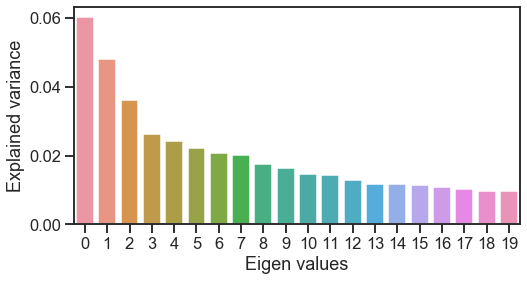

0.21710964850297496


(array([-0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,
         0.25]), <a list of 10 Text yticklabel objects>)

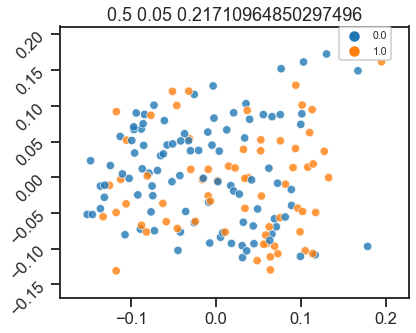

In [86]:
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, sigmoid_kernel, laplacian_kernel
gamma = 0.05
degree = 4 
mu = 0.5
num_labels = y.nunique()[0]
# Apply rbf kernel to divided datasets
K1 = rbf_kernel(X=X_first)
K2 = laplacian_kernel(X=X_second)

Ktot = mu*K1 + (1-mu)*K2

# Use Ktot to perform KPCA 
kpca = KernelPCA(kernel="precomputed")
X_kpca = kpca.fit_transform(Ktot)
X_kpca_var = np.var(X_kpca,0)
X_kpca_var_ratio = X_kpca_var / sum(X_kpca_var)
X_kpca_train_labeled = np.c_[X_kpca , y]

ax1 = plt.subplot(1,1,1)
ax1.figure.set_size_inches((8, 4))
sns.barplot(np.arange(np.shape(X_kpca_var_ratio[:20])[0]),X_kpca_var_ratio[:20])
plt.xlabel("Eigen values")
plt.ylabel("Explained variance")
plt.show()

print(X_kpca_var_ratio[:6].sum())

pc1_explained_variance = X_kpca_var_ratio[0]
pc2_explained_variance = X_kpca_var_ratio[1]
pc1_ratio = pc1_explained_variance / (pc1_explained_variance + pc2_explained_variance)

# Plot first 2 principal components
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
ax1 = plt.subplot(1,1,1)
sns.scatterplot(x=X_kpca[:,0], 
                y=X_kpca[:,1], 
                alpha = 0.8, 
                s= 70, legend='full', 
                hue=X_kpca_train_labeled[:,-1])
ax1.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True, fontsize='xx-small')
ax1.figure.set_size_inches( (5*(pc1_ratio/(1 - pc1_ratio)),5) )
ax1.set_title(f"{mu} {gamma} {X_kpca_var_ratio[:6].sum()}")
plt.yticks(rotation=45) 